In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import underthesea as uts
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('./labeled_sentences.csv', encoding='utf8', engine='python')

In [3]:
df = df.drop_duplicates(subset='Sentence', keep='last')

In [4]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)

In [5]:
vectorizer = TfidfVectorizer(tokenizer = uts.word_tokenize,
                             min_df = 0.01,
                             max_df = 0.7,
                             sublinear_tf = True,
                             use_idf = True)

In [6]:
train_vectors = vectorizer.fit_transform(train['Sentence']).toarray()
test_vectors = vectorizer.transform(test['Sentence']).toarray()

In [7]:
# Perform classification with SVM
svm_classifier = svm.SVC(kernel='poly', degree=1)
svm_classifier.fit(train_vectors, train['Sentiment'])
svm_prediction = svm_classifier.predict(test_vectors)
report_svm = classification_report(test['Sentiment'], svm_prediction, output_dict=True)
print('positive: ', report_svm['1.0'])
print('negative: ', report_svm['-1.0'])
print('neutral: ', report_svm['0.0'])
#SVM

positive:  {'precision': 0.7195121951219512, 'recall': 0.7375, 'f1-score': 0.7283950617283951, 'support': 80}
negative:  {'precision': 0.7264150943396226, 'recall': 0.7333333333333333, 'f1-score': 0.7298578199052131, 'support': 105}
neutral:  {'precision': 0.6296296296296297, 'recall': 0.6071428571428571, 'f1-score': 0.6181818181818182, 'support': 84}


In [8]:
# Perform classification with Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(train_vectors, train['Sentiment'])
nb_prediction = nb_classifier.predict(test_vectors)
report_nb = classification_report(test['Sentiment'], nb_prediction, output_dict=True)
print('positive: ', report_nb['1.0'])
print('negative: ', report_nb['-1.0'])
print('neutral: ', report_nb['0.0'])
#Naive Bayes

positive:  {'precision': 0.4171779141104294, 'recall': 0.85, 'f1-score': 0.5596707818930041, 'support': 80}
negative:  {'precision': 0.6415094339622641, 'recall': 0.3238095238095238, 'f1-score': 0.430379746835443, 'support': 105}
neutral:  {'precision': 0.5660377358490566, 'recall': 0.35714285714285715, 'f1-score': 0.43795620437956206, 'support': 84}


In [9]:
# Perform classification with KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_vectors, train['Sentiment'])
knn_prediction = knn_classifier.predict(test_vectors)
report_knn = classification_report(test['Sentiment'], knn_prediction, output_dict=True)
print('positive: ', report_knn['1.0'])
print('negative: ', report_knn['-1.0'])
print('neutral: ', report_knn['0.0'])
#KNN

positive:  {'precision': 0.6388888888888888, 'recall': 0.575, 'f1-score': 0.6052631578947367, 'support': 80}
negative:  {'precision': 0.5806451612903226, 'recall': 0.6857142857142857, 'f1-score': 0.62882096069869, 'support': 105}
neutral:  {'precision': 0.5616438356164384, 'recall': 0.4880952380952381, 'f1-score': 0.5222929936305732, 'support': 84}


In [10]:
#Test
review = "Chứng khoán ngày hôm qua biến động tăng"
review_vector = vectorizer.transform([review]).toarray()

In [11]:
print(svm_classifier.predict(review_vector))

[1.]


In [12]:
print(nb_classifier.predict(review_vector))

[1.]


In [13]:
print(knn_classifier.predict(review_vector))

[1.]


#save_trainned_data
with open('nlp_svm_model.pkl','wb') as f:
    pickle.dump(svm_classifier,f)
with open('vectorizer_model.pkl','wb') as f:
    pickle.dump(vectorizer,f)

# Labeled data insight

In [14]:
#def filter
def has_numbers(input_str):
    return any(char.isdigit() for char in input_str)
def has_special_chars(input_str):
    any(not (c.isalnum() and c.isspace()) for c in input_str)
def has_few_chars(input_str):
    return len(input_str) <= 2

In [15]:
txt = ''
for s in df['Sentence']:
    txt += s
words = uts.word_tokenize(txt)
for word in words:
    if has_numbers(word) or has_few_chars(word) or has_special_chars(word):
        words.remove(word)

In [16]:
fd = nltk.FreqDist(words)
common_words = fd.most_common(15)
del common_words[7]
del common_words[7]

Text(0.5, 1.0, 'Tần suất xuất hiện của các từ trong tập dữ liệu đã gán nhãn')

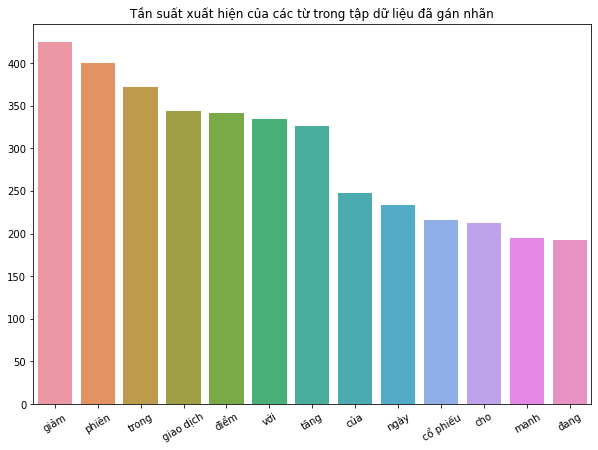

In [17]:
all_fdist = common_words
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(10,7))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.title('Tần suất xuất hiện của các từ trong tập dữ liệu đã gán nhãn')

In [18]:
#Data so cau tich,tieu cuc, trung tinh
sentiment_data = df['Sentiment'].value_counts().to_dict()

In [19]:
list(sentiment_data.values())

[348, 296, 251]

Text(0.5, 1.0, 'Tần suất câu mang tính')

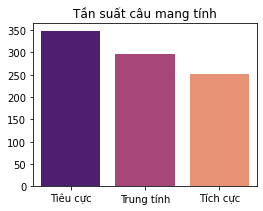

In [20]:
fig, ax = plt.subplots(figsize=(4,3))
lg = ["Tiêu cực","Trung tính","Tích cực"]
all_plot = sns.barplot(x=lg, y=list(sentiment_data.values()), palette='magma', ax=ax)
plt.title('Tần suất câu mang tính')

In [23]:
#model/sentiment/f1
plot_chart = {'model': [], 'sentiment': [], 'f1': []}
#range 3 - '1' '-1' '0'
for i in range(3):
    plot_chart['model'].append('SVM')
    plot_chart['sentiment'].append(list(report_svm.keys())[i])
    plot_chart['f1'].append(list(report_svm.values())[i]['f1-score'])
    plot_chart['model'].append('NB')
    plot_chart['sentiment'].append(list(report_nb.keys())[i])
    plot_chart['f1'].append(list(report_nb.values())[i]['f1-score'])
    plot_chart['model'].append('KNN')
    plot_chart['sentiment'].append(list(report_knn.keys())[i])
    plot_chart['f1'].append(list(report_knn.values())[i]['f1-score'])
plot_chart = pd.DataFrame(plot_chart)

Text(0.5, 20.80000000000002, '')

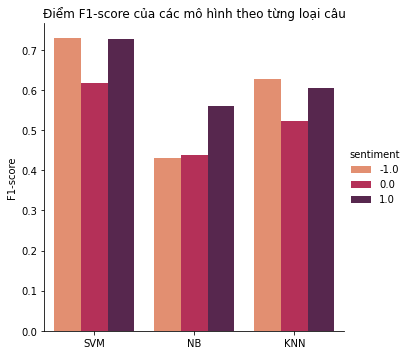

In [24]:
sns.catplot(x='model', y='f1', hue='sentiment', data=plot_chart, kind='bar', palette='rocket_r')
plt.title('Điểm F1-score của các mô hình theo từng loại câu')
plt.ylabel('F1-score')
plt.xlabel('')

#End